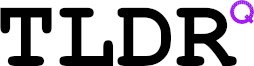

In the TLDR (Too Long; didn't read) notebooks, I don't try to do any fancy feature engineering, data cleaning, n-fold validation, or similar time consuming techniques. I simply solve the problem in six staightforward steps:

1. Load the data
2. Split in train and test sets
3. Determine in input features are categorical or continuous
4. Connect to a QLattice and reset it
5. Use QLattice to find the simples possible model
6. Evaluate the model (with AUC for classification and $R^2$ for regression)


In [ ]:
!pip install feyn

# 1. Load the data

In [ ]:
import feyn
import pandas as pd
df = pd.read_csv("/kaggle/input/spanish-wine-quality-dataset/wines_SPA.csv")
df = df.dropna()

# 2. Split the data

In [ ]:
train, test = feyn.tools.split(df, ratio=(2,1), random_state=42)

# 3. Identify categorical features

In [ ]:
stypes = {name: "cat" for name in df if df[name].dtype=="object"}

# 4. QLattice

In [ ]:
ql = feyn.QLattice(random_seed=42)

# 5. Find the model

In [ ]:
models = ql.auto_run(train.drop(["wine"],axis=1), output_name="rating", stypes=stypes, n_epochs=20)

# 6. Evaluate

In [ ]:
models[0].plot(train, test)

It looks like we have a pretty good $R^2$ from a few of the features. A lot of additional exploration would be useful, but there is signal in the data. 

There is also a bit of overfitting involved, which could be mitigated by leaving out the winery from the feature set. 

# THE END